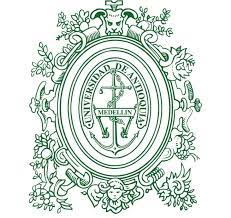
## <center>  UNIVERSIDAD DE ANTIOQUIA </center>
### <center>  PROCESAMIENTO DIGITAL DE SEÑALES </center>
### <center> TRABAJO FINAL- ANÁLISIS DE DISFONÍA </center>
### <center> YENI FERNANDA HERNANDEZ C.C 1083921120</center>

### ¿Qué es la Disfonía?
La disfonía es una afección que se caracteriza por una alteración en la calidad vocal, por lo que el análisis de la frecuencia fundamental de la voz puede ser útil para detectar esos cambios en la voz, tambien La disfonía puede producir cambios en la distribución de energía que puede ser detectado a través del análisis de la señal.


### 1. Carga, normalización y gráfica de la señal 1.
Cargue, normalice y grafique una señal de voz nombrada "vozdisfoniamono.wav"

In [6]:
###IMPORTACION DE LIBRERIAS A USAR

import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import signal
from scipy.io.wavfile import read,write
from IPython.display import Audio
%matplotlib inline

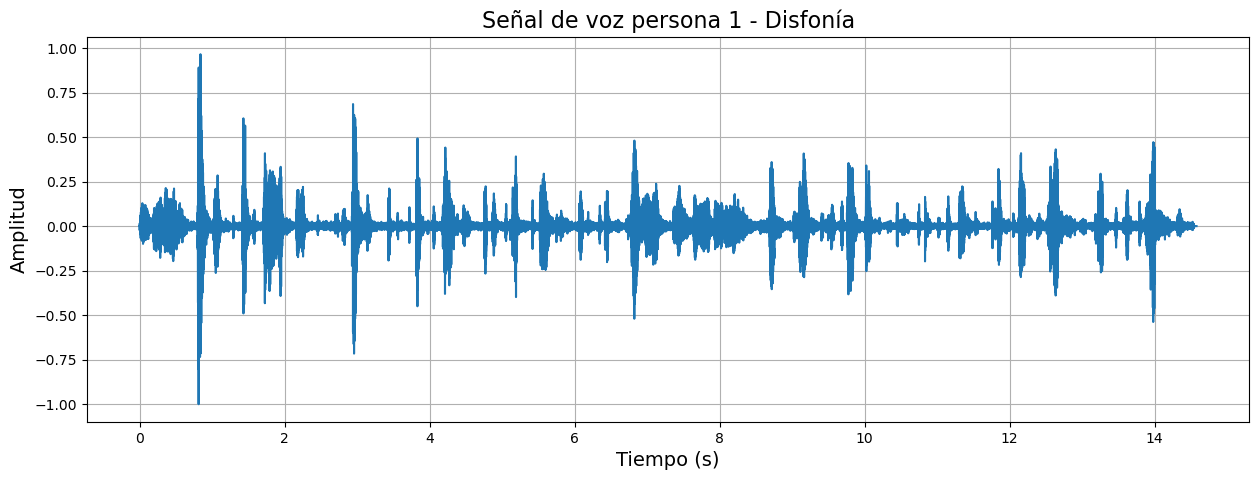

frecuencia de muestreo 8000


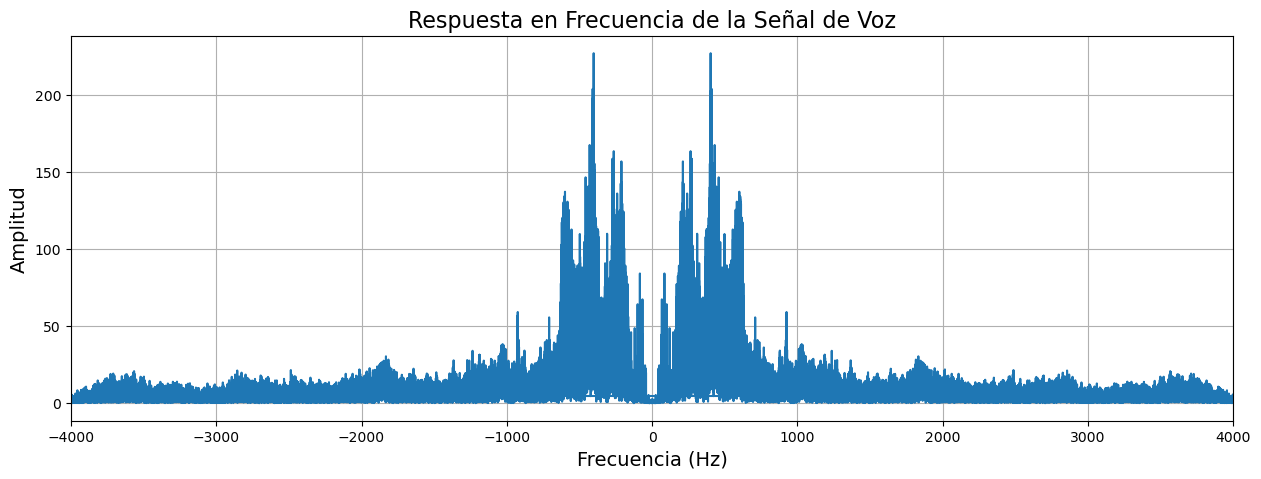

In [7]:
file_audio= ('vozdisfoniamono.wav') #carga del audio
fs,y= read(file_audio)
y = y/float(np.max(np.abs(y))) #normalización
t = np.arange(0,len(y)/fs,1/fs)# Vector de tiempo

# Grafica señal original
plt.figure(figsize=(15,5))
plt.plot(t, y)
plt.title("Señal de voz persona 1 - Disfonía", fontsize="16")
plt.xlabel("Tiempo (s)", fontsize="14")
plt.ylabel("Amplitud", fontsize="14")
plt.grid()
plt.show()
print("frecuencia de muestreo",fs)

TY = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), 1/fs)

# Visualización de la respuesta en frecuencia
plt.figure(figsize=(15, 5))
plt.plot(freq, np.abs(TY))
plt.xlim(-4000,4000)
plt.title("Respuesta en Frecuencia de la Señal de Voz", fontsize=16)
plt.xlabel("Frecuencia (Hz)", fontsize=14)
plt.ylabel("Amplitud", fontsize=14)
plt.grid(True)
plt.show()

Audio(y, rate=fs)

### 2. Diseño de filtro FIR pasa bajas.

#### 2.1 Diseñar un filtro pasa-bajas para eliminar las frecuencias no deseadas y permitir el paso de las frecuencias bajas.

Realizarlo con los siguientes parametros:
* fc=1000.0
* fs=8000.0 # frec de muestreo
* Adb=0 # Ganancia del filtro en decibeles
* N = 512 # Numero de puntos de la FFT
* BW=1000 # Ancho de banda en la banda de transicion
* ripple = 0.4%


In [12]:
import numpy as np
from matplotlib.pylab import *
#from scipy import *
import scipy.signal as signal
#from ztrans import *
%matplotlib inline

def Filter(name='filtername'):
    def choose_windows(name2='filtername2', N=33):
        # Rect/Hanning/Hamming
        if name2 == 'Hamming':
            window = np.array([0.54 - 0.46 * np.cos(2 * np.pi * n / (N - 1)) for n in range(N)])
        elif name2 == 'Hanning':
            window = np.array([0.5 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) for n in range(N)])
        elif name2 == 'Rect':
            window = np.ones(N)
        elif name2 == 'black':
            window = np.array([0.42-0.5*np.cos((2*np.pi*n)/(N-1))+0.08*np.cos((4*np.pi*n)/(N-1))for n in range(N)])
        return window

    ##parametros
    fc=1000.0
    fs=8000.0 # frec de muestreo
    Adb=0 # Ganancia del filtro en decibeles
    N = 512 # Numero de puntos de la FFT
    BW=1000 # Ancho de banda en la banda de transicion
    wc = 2*np.pi*fc/fs # frecuencia de corte normalizada en radianes
    bwn=BW/fs # ancho de banda  normalizado en radianes
    M=int(4/bwn) # orden estimado del filtro
    if M % 2 == 0:
        M= M+1
        
    print('Orden del filtro: ', M)
    n = np.arange(-M,M)

    ##Diseño del filtro
    h1 = (wc)/np.pi * np.sinc(wc*(n)/np.pi) # Respuesta del filtro ideal 
    w1,Hh1 = signal.freqz(h1,1,whole=True, worN=N) # Respuesta en frecuencia del filtro ideal
    win2 = choose_windows(name2 =name, N=len(n))
    h2=h1*win2 # Multiplico la respuesta ideal por la ventana
    A=np.sqrt(10**(0.1*Adb))
    h2=h2*A # Ganancia del filtro
    w2,Hh2 = signal.freqz(h2,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado

    ####Graficas
    fig1,axs1 = subplots(4,1)
    fig1.set_size_inches((8,12))
    subplots_adjust(hspace=0.4)

    ax=axs1[0]
    ax.stem(n+M,h1,basefmt='b-')
    ax.set_xlabel("$n$",fontsize=24)
    ax.set_ylabel("$h_1$",fontsize=24)


    ax=axs1[1]
    ax.stem(n+M,h2,basefmt='b-')
    ax.set_xlabel("$n$",fontsize=24)
    ax.set_ylabel("$h_2$",fontsize=24)

    ax=axs1[2]
    ax.plot((w1-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh1)))
    ax.axis(xmax=fs/2,xmin=-fs/2)
    ax.vlines([-fc,fc],0,1,color='g',lw=2.,linestyle='--')
    ax.hlines(1,-fc,fc,color='g',lw=2.,linestyle='--')
    ax.set_xlabel(r"$f (Hz)$",fontsize=18)
    ax.set_ylabel(r"$|H1(\omega)| $",fontsize=18)

    ax=axs1[3]
    ax.plot((w2-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh2)))
    ax.axis(xmax=fs/2,xmin=-fs/2)
    ax.vlines([-fc,fc],0,1,color='g',lw=2.,linestyle='--')
    ax.hlines(1,-fc,fc,color='g',lw=2.,linestyle='--')
    ax.set_xlabel(r"$f (Hz)$",fontsize=18)
    ax.set_ylabel(r"$|H2(\omega)| $",fontsize=18)
    
    return(h2)

#### 2.2 Encontrar matematicamente la ventana que mejor se acomoda y el orden del filtro ideal.

se tiene que el ripple en dB es -48bB por lo tanto matematicamente lo ideal es escoger la ventana hamming, el orden del filtro debe ser N > 4fs/Bw = 32, para facilidad en el análisis el orden del filtro se trabajará con 33.

#### 2.3 Realizar un codigo para el diseño del filtro con el orden encontrado y realizarlo con un enventanado Rectangular, blackman y Hamming.

Grafique el filtro sin enventanar y enventanado, qué puede observar?, aplique el filtro a la señal original y analice. 

###### Diseño de Filtro con enventanado Rectangular

Orden del filtro:  33


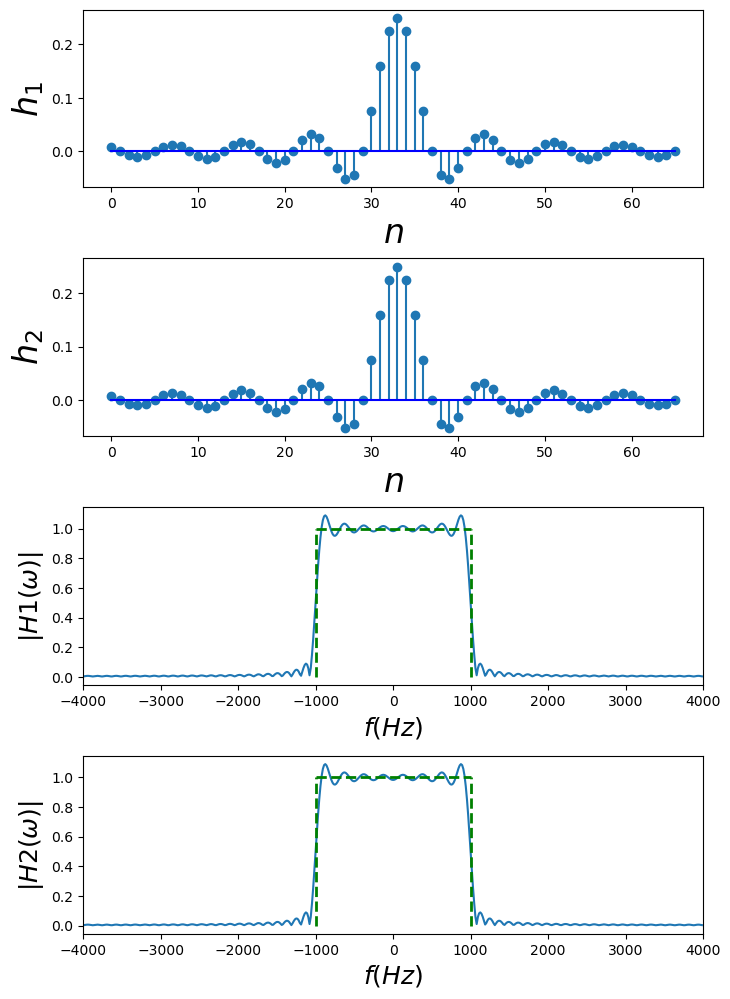

In [18]:
hrect  = Filter(name='Rect')


Se observa bastante ripple en el filtro y una caida roll-off rapida.

##### Aplicacion filtro a la señal original Rect

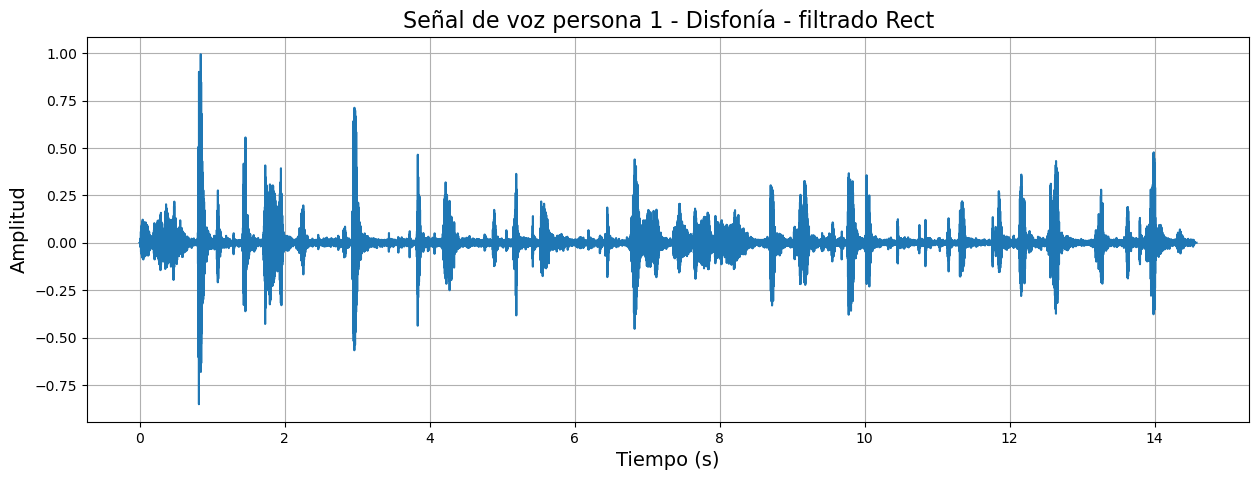

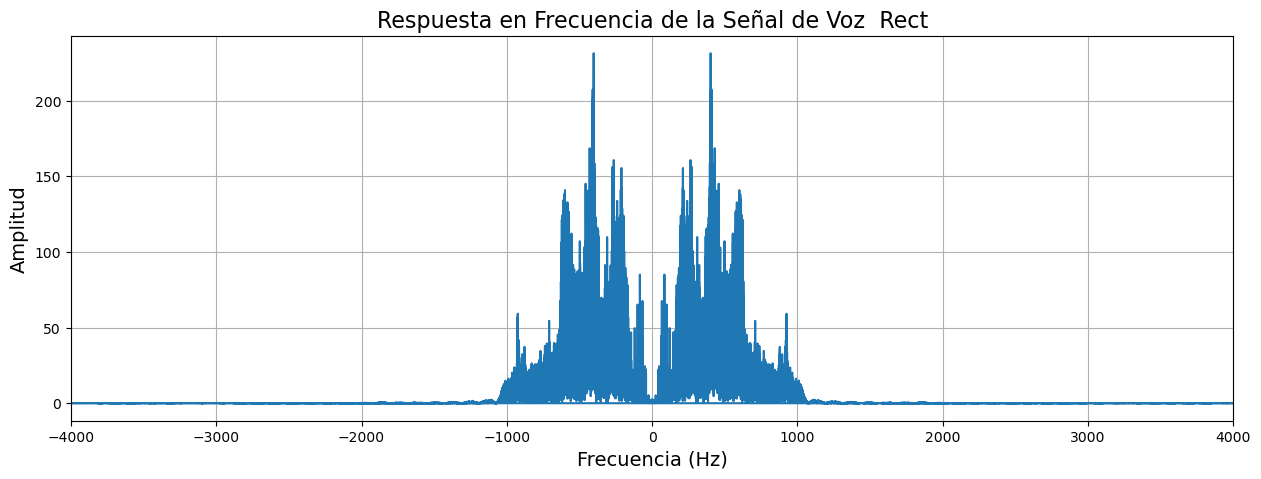

In [19]:
filtered_rect = signal.lfilter(hrect, 1.0,y)

###Grafica de la señal filtrada filtro 2
t = np.arange(0,len(filtered_rect)/fs,1/fs)# Vector de tiempo
plt.figure(figsize=(15,5))
plt.plot(t, filtered_rect)
plt.title("Señal de voz persona 1 - Disfonía - filtrado Rect", fontsize="16")
plt.xlabel("Tiempo (s)", fontsize="14")
plt.ylabel("Amplitud", fontsize="14")
plt.grid()
plt.show()

Tfilteded_rect = np.fft.fft(filtered_rect)
freq = np.fft.fftfreq(len(Tfilteded_rect), 1/fs)

# Visualización de la respuesta en frecuencia
plt.figure(figsize=(15, 5))
plt.plot(freq, np.abs(Tfilteded_rect))
plt.xlim(-4000,4000)
plt.title("Respuesta en Frecuencia de la Señal de Voz  Rect", fontsize=16)
plt.xlabel("Frecuencia (Hz)", fontsize=14)
plt.ylabel("Amplitud", fontsize=14)
plt.grid(True)
plt.show()

Audio(filtered_rect,rate=fs)

##### Realizando Zoom a la señal

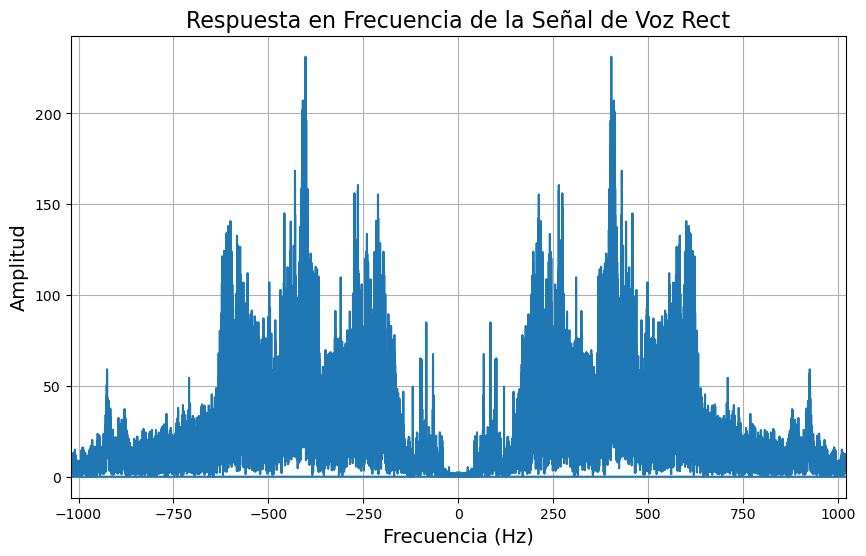

In [20]:
# Visualización de la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.plot(freq, np.abs(Tfilteded_rect))
plt.xlim(-1020,1020)
plt.title("Respuesta en Frecuencia de la Señal de Voz Rect", fontsize=16)
plt.xlabel("Frecuencia (Hz)", fontsize=14)
plt.ylabel("Amplitud", fontsize=14)
plt.grid(True)
plt.show()

Audio(filtered_rect,rate=fs)

La ventana rectangular se puede observar que se tiene una mayor amplitud de los lóbulos laterales y una transición menos suave entre las regiones de paso y atenuación del filtro.
En el dominio del tiempo, el enventanado con ventana rectangular puede causar efectos de fugas de energía hacia frecuencias no deseadas y una respuesta más ancha en términos de duración temporal.

##### Diseño de Filtro con enventanado hamming

Orden del filtro:  33


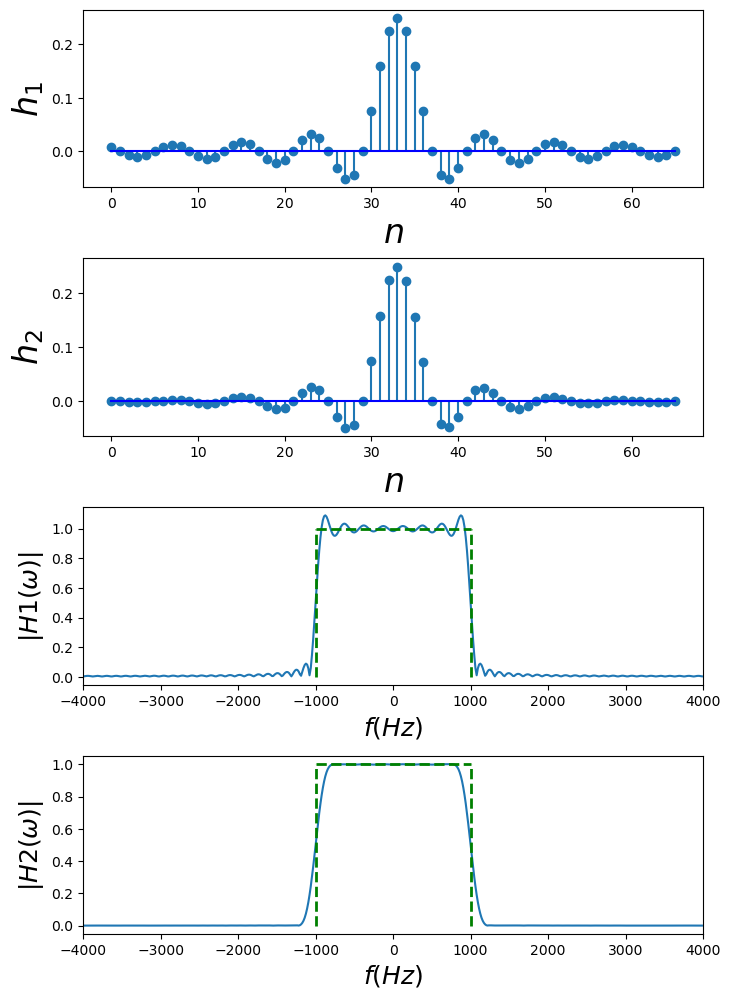

In [22]:
hham = Filter(name='Hamming')

Se observa como el Ripple disminuyo pero la caida de Roll-off es más lenta.

##### Aplicacion filtro a la señal original hamming

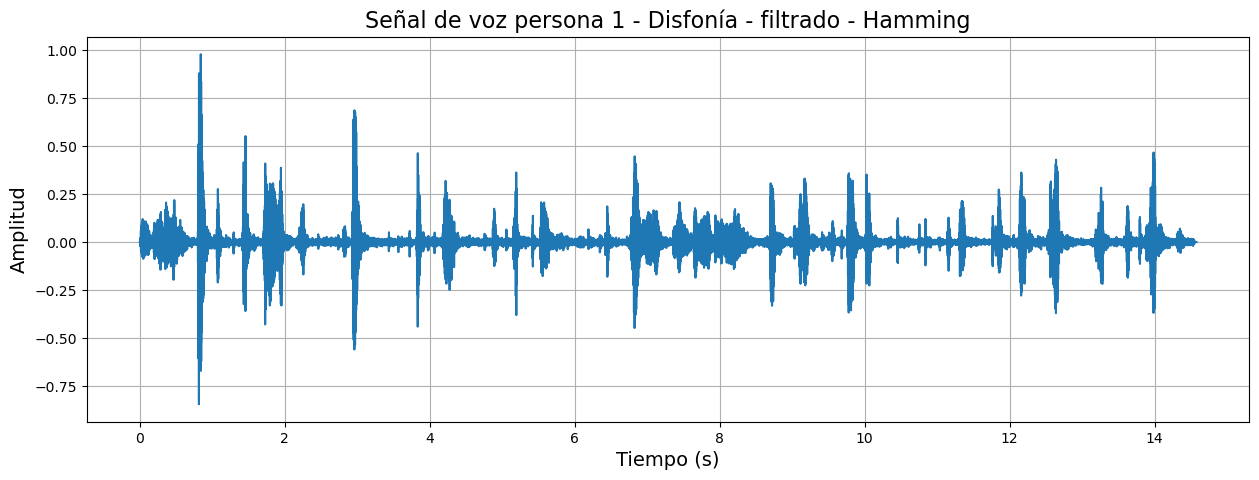

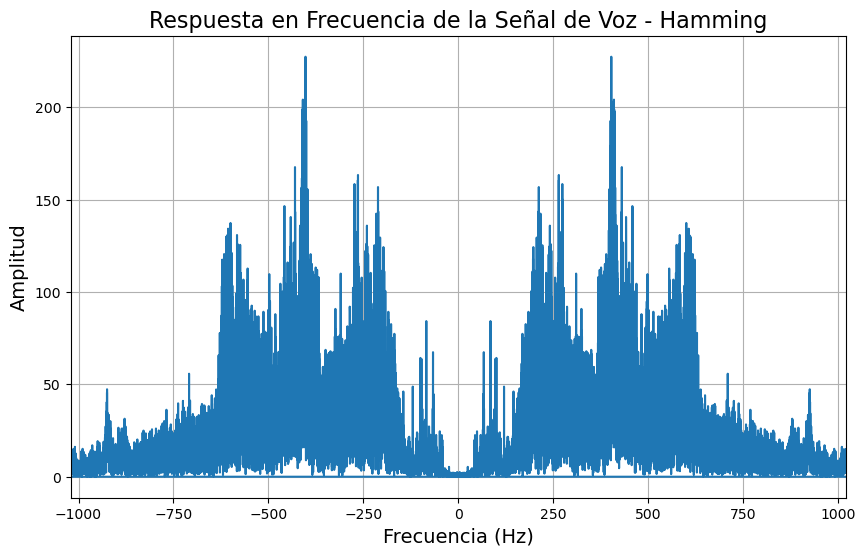

In [23]:
filtered_hamming = signal.lfilter(hham, 1.0,y)

###Grafica de la señal filtrada filtro 2
t = np.arange(0,len(filtered_hamming)/fs,1/fs)# Vector de tiempo
plt.figure(figsize=(15,5))
plt.plot(t, filtered_hamming)
plt.title("Señal de voz persona 1 - Disfonía - filtrado - Hamming", fontsize="16")
plt.xlabel("Tiempo (s)", fontsize="14")
plt.ylabel("Amplitud", fontsize="14")
plt.grid()
plt.show()

Tfiltered_hamming = np.fft.fft(filtered_hamming)
freq = np.fft.fftfreq(len(y), 1/fs)

# Visualización de la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.plot(freq, np.abs(Tfiltered_hamming))
plt.xlim(-1020,1020)
plt.title("Respuesta en Frecuencia de la Señal de Voz - Hamming", fontsize=16)
plt.xlabel("Frecuencia (Hz)", fontsize=14)
plt.ylabel("Amplitud", fontsize=14)
plt.grid(True)
plt.show()

Audio(filtered_hamming,rate=fs)

Se puede observar que La ventana Hamming esta suavizando la transición al inicio y al final de la señal (la componente en frecuencia menor de -750hz tiene una amplitud menor en comparación del filtro con enventanado rectangular)
por lo que el enventanado con ventana Hamming produce una mejor supresión de los lóbulos laterales y una transición más suave entre las regiones de paso y atenuación del filtro, además en dominio del tiempo, el enventanado con ventana Hamming ayuda a reducir los efectos de fugas de energía hacia frecuencias no deseadas y generando una respuesta más nítida y selectiva para analizar.

##### Diseño de Filtro con enventanado Blackman

Orden del filtro:  33


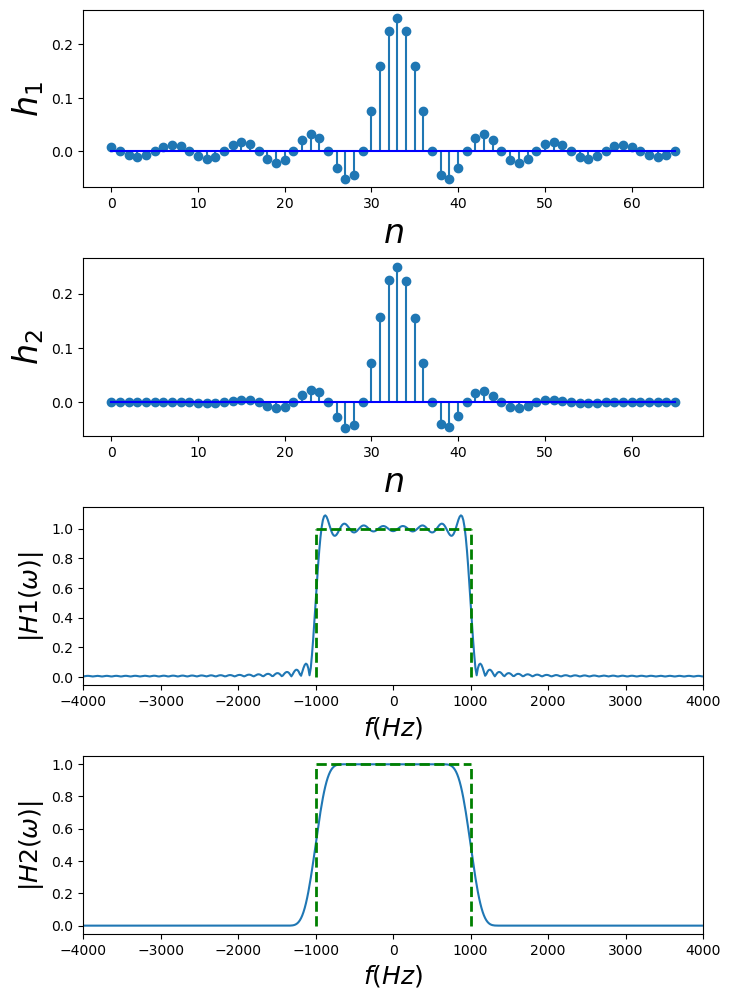

In [24]:
hblack = Filter(name='black')

Se observa que se tiene aproximadamente el mismo Ripple que la anterior pero la caida de Roll-off es mucho más lenta.

##### 2.3.1 Aplicacion filtro a la señal original blackman

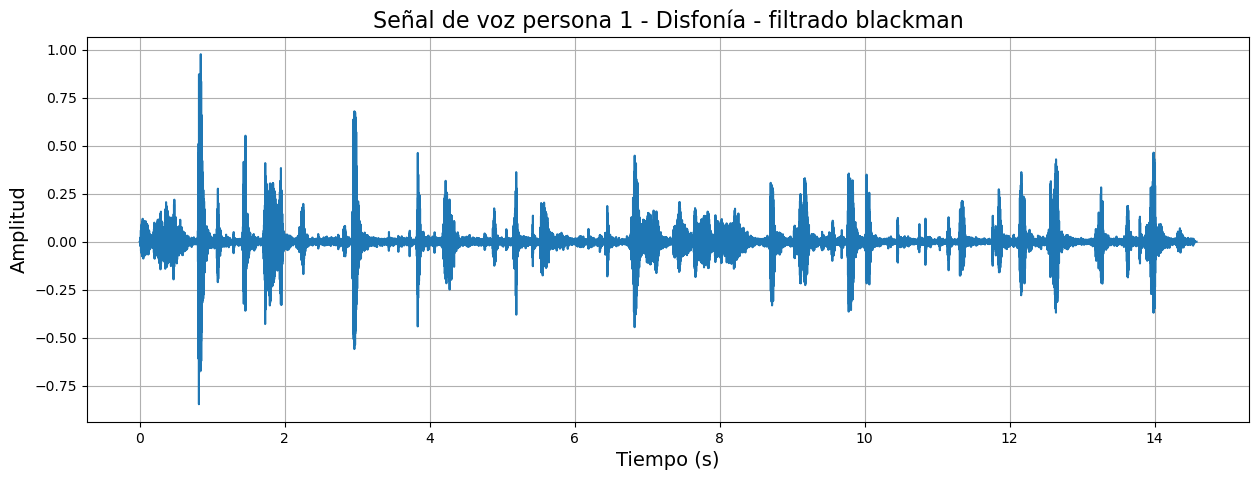

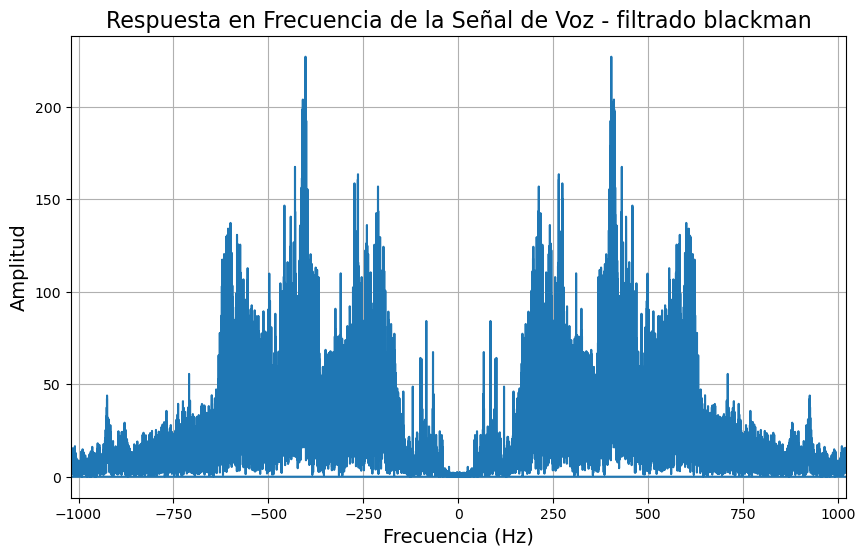

In [25]:
filtered_black = signal.lfilter(hblack, 1.0,y)

###Grafica de la señal filtrada filtro 2
t = np.arange(0,len(filtered_black)/fs,1/fs)# Vector de tiempo
plt.figure(figsize=(15,5))
plt.plot(t, filtered_black)
plt.title("Señal de voz persona 1 - Disfonía - filtrado blackman", fontsize="16")
plt.xlabel("Tiempo (s)", fontsize="14")
plt.ylabel("Amplitud", fontsize="14")
plt.grid()
plt.show()

Tfiltered_black = np.fft.fft(filtered_black)
freq = np.fft.fftfreq(len(y), 1/fs)

# Visualización de la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.plot(freq, np.abs(Tfiltered_black))
plt.xlim(-1020,1020)
plt.title("Respuesta en Frecuencia de la Señal de Voz - filtrado blackman", fontsize=16)
plt.xlabel("Frecuencia (Hz)", fontsize=14)
plt.ylabel("Amplitud", fontsize=14)
plt.grid(True)
plt.show()

Audio(filtered_black,rate=fs)

##### 2.4 Es necesario encontrar un equilibrio adecuado al seleccionar una ventana para un filtro específico, teniendo en cuenta las características deseadas y los posibles efectos secundarios ¿qué ventana aplicaría? ¿por qué?.

Realizando un análisis de la ventana Hamming vs la ventana Blackman, la ventana de Hamming proporciona una buena combinación de atenuación del lóbulo lateral y ancho del lóbulo principal, Por otro lado, la ventana de Blackman ofrece una mejor atenuación del lóbulo lateral por el lóbulo principal más ancho, es decir que se tiene una estimación más precisa de la frecuencia fundamental pero esto puede tener un efecto en la resolución espectral, ya que la capacidad para distinguir componentes espectrales muy cercanas puede disminuir en comparación con la ventana de Hamming, que tiene lóbulos laterales más anchos.

por lo tanto considerando que no se conoce siempre que tan cercanas pueden estar las componentes en frecuencia y el posible riesgo que se tiene se escoge la ventana Hamming para continuar el proceso.

Analizando matematicamente, ya que se quiere un ripple de 0.4% según las especificaciones de las tablas la ventana hamming y blackman se ajustan al proceso requerido pero por cuestiones de ingeniería siempre se toma la que este más cerca por debajo, 
coincidiendo así matematicamente con el analisís de las graficas de los filtros con diferentes enventanados.

### 3. Análisis de Fourier 
##### Señal filtrada con enventanado adecuado

3.1 Seleccione el filtro con el enventanado adecuado para la señal y halle la transformada rapida de Fourier con el fin de analizar la señal en el dominio de la frecuencia.

Se escogio ventana Hamming por las razones explicadas anteriormente.

In [36]:
Y = np.fft.fft(filtered_hamming) #transformada rapida de fourier 
freqs = np.fft.fftfreq(len(Y), 1/fs)

3.2 Calcule la frecuencia fundamental (pico más alto del espectro) que tiene la voz y determine si se presenta indicios de disfonía o no, la frecuencia más baja esta representando la vibración de las cuerdas vocales lo que determina disfonía si esta fuera del rango normal.

La frecuencia fundamental es 402.47301040139257


Text(0.5, 1.0, 'Espectro de la Señal de voz - persona 1 - Disfonía')

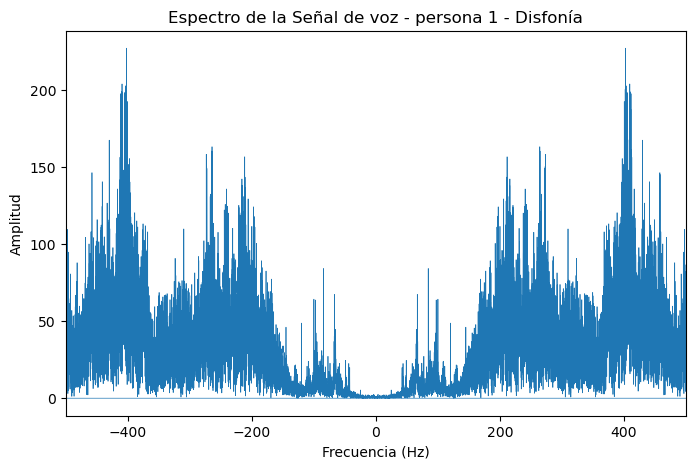

In [27]:
# Frecuencia fundamental
idx = np.argmax(np.abs(Y))
fund_freq = freqs[idx]
print("La frecuencia fundamental es",fund_freq)

# Graficar el espectro
plt.figure(figsize=(8, 5))
plt.plot(freqs[:len(freqs)], np.abs(Y[:len(Y)]), linewidth=0.5)
plt.xlim(-500,500)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de la Señal de voz - persona 1 - Disfonía')


3.3 Análice la energía espectral. Esta técnica consiste en analizar la distribución de energía de la señal de voz en diferentes bandas de frecuencia ya que La disfonía puede producir cambios en la distribución de energía.

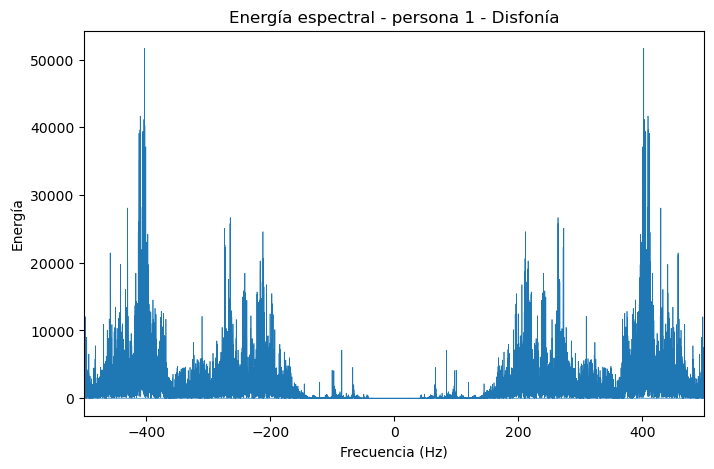

In [28]:
# Energía espectral
power = np.abs(Y)**2
# Graficar la energía espectral
plt.figure(figsize=(8, 5))
plt.plot(freqs[:len(freqs)], power[:len(power)], linewidth=0.5)
plt.xlim(-500,500)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Energía')
plt.title('Energía espectral - persona 1 - Disfonía')
plt.show()

Se puede observar como el espectro representa la amplitud de las diferentes frecuencias presentes en la señal y la energía espectral representa la energía de la señal en cada frecuencia y Analizando la grafica del espectro se puede observar que la frecuencia de la fundamental se encuentra por encima de los 255 hz, generando una incertidumbre en la calidad de la voz de la persona.

###  4. Comprobación de anomalia en la voz de la persona 1.

Determine en primera instancia si existe indícios de disfonía en la persona ya que  la frecuencia fundamental de la voz en un rango de normal oscila entre las siguientes frecuencias:

* Hombres adultos oscila entre 85 y 180 Hz.
* Mujeres adultas oscila entre 165 y 255 Hz. 


In [29]:
# Detección
if fund_freq < 85 or fund_freq > 255:
    print('Persona con indicios de Disfonía, la frecuencia fundamental (',fund_freq,'HZ) NO esta dentro del rango normal')
else:
    print('Persona con buena calidad vocal, La frecuencia fundamental está dentro del rango normal')

Persona con indicios de Disfonía, la frecuencia fundamental ( 402.47301040139257 HZ) NO esta dentro del rango normal


### 5. Detección de anomalías en audio 2.

Repita los pasos 1,3,4 para determinar anomalías en la señal de voz 2 "voznormal.wap".

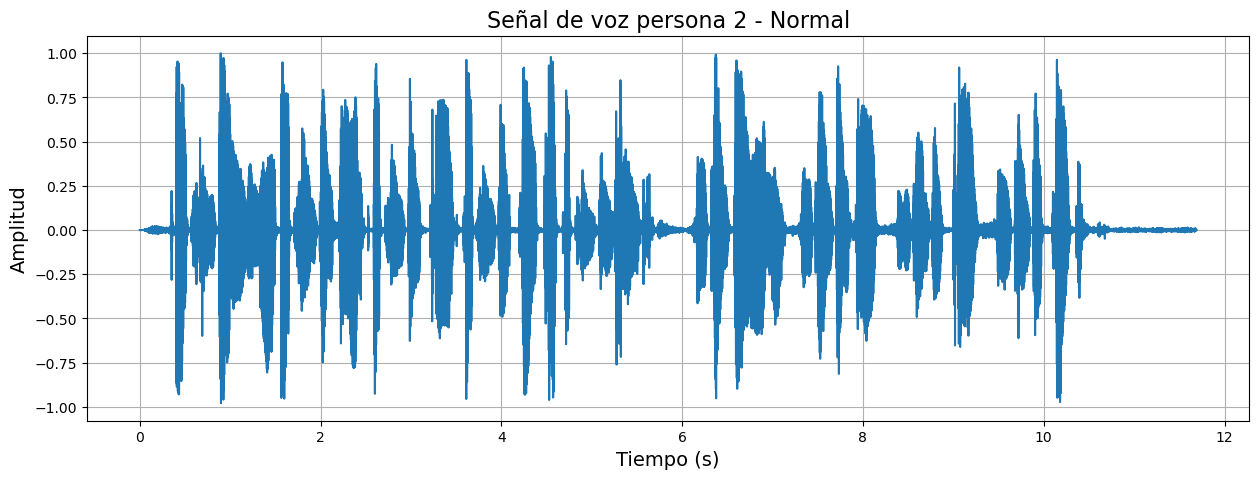

frecuencia de muestreo 8000


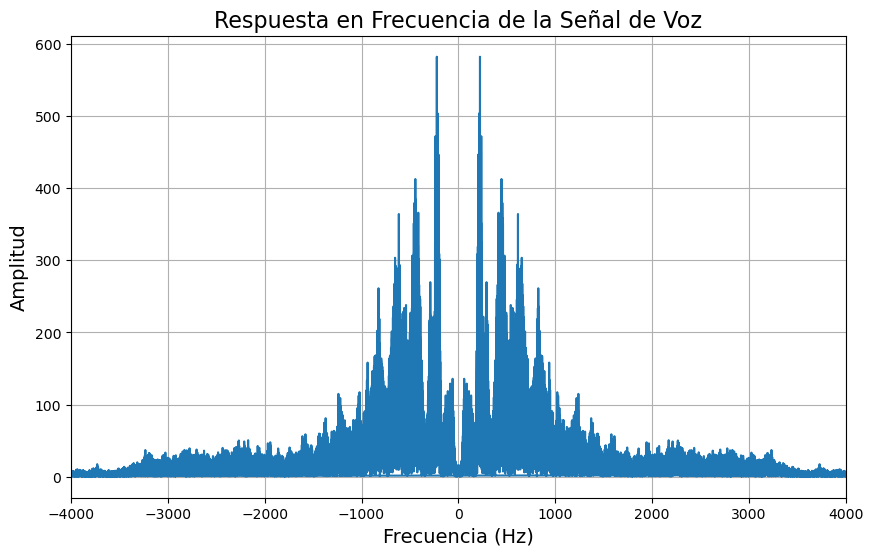

In [30]:
file_audio= ('voznormal.wav') #carga del audio
fs,y= read(file_audio)
y = y/float(np.max(np.abs(y))) #normalización
t = np.arange(0,len(y)/fs,1/fs)# Vector de tiempo

# Grafica señal original
plt.figure(figsize=(15,5))
plt.plot(t, y)
plt.title("Señal de voz persona 2 - Normal", fontsize="16")
plt.xlabel("Tiempo (s)", fontsize="14")
plt.ylabel("Amplitud", fontsize="14")
plt.grid()
plt.show()
print("frecuencia de muestreo",fs)

TY = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), 1/fs)

# Visualización de la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.plot(freq, np.abs(TY))
plt.xlim(-4000,4000)
plt.title("Respuesta en Frecuencia de la Señal de Voz", fontsize=16)
plt.xlabel("Frecuencia (Hz)", fontsize=14)
plt.ylabel("Amplitud", fontsize=14)
plt.grid(True)
plt.show()

Audio(y, rate=fs)

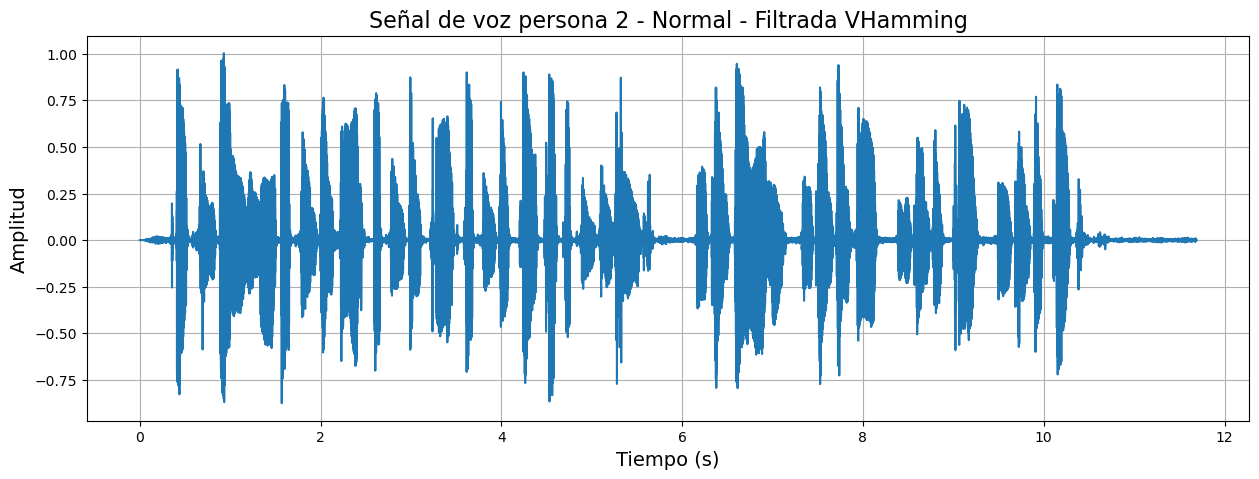

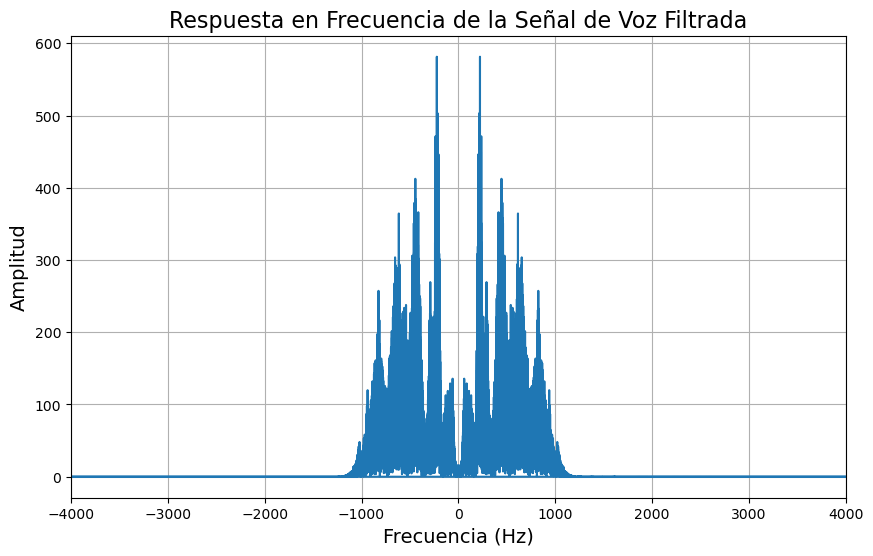

In [32]:
filtered_hamming = signal.lfilter(hham, 1.0,y)

###Grafica de la señal filtrada filtro 2
t = np.arange(0,len(filtered_hamming)/fs,1/fs)# Vector de tiempo
plt.figure(figsize=(15,5))
plt.plot(t, filtered_hamming)
plt.title("Señal de voz persona 2 - Normal - Filtrada VHamming", fontsize="16")
plt.xlabel("Tiempo (s)", fontsize="14")
plt.ylabel("Amplitud", fontsize="14")
plt.grid()
plt.show()

Tfiltered_hamming = np.fft.fft(filtered_hamming)
freq = np.fft.fftfreq(len(y), 1/fs)

# Visualización de la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.plot(freq, np.abs(Tfiltered_hamming))
plt.xlim(-4000,4000)
plt.title("Respuesta en Frecuencia de la Señal de Voz Filtrada", fontsize=16)
plt.xlabel("Frecuencia (Hz)", fontsize=14)
plt.ylabel("Amplitud", fontsize=14)
plt.grid(True)
plt.show()

Audio(filtered_hamming,rate=fs)

In [33]:
Y = np.fft.fft(filtered_hamming) #transformada rapida de fourier 
freqs = np.fft.fftfreq(len(Y), 1/fs)

La frecuencia fundamental es 222.74020058593334


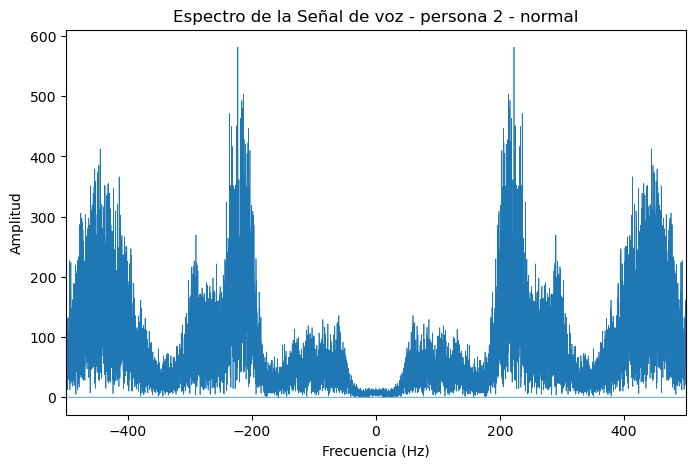

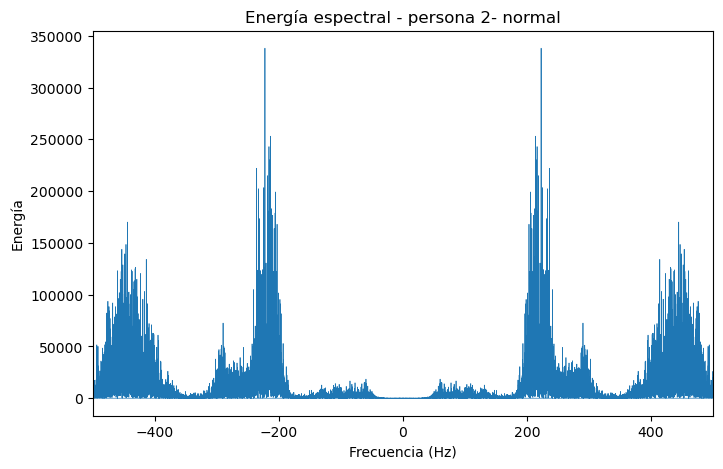

In [34]:
# Frecuencia fundamental
idx = np.argmax(np.abs(Y))
fund_freq = freqs[idx]
print("La frecuencia fundamental es",fund_freq)

# Graficar el espectro
plt.figure(figsize=(8, 5))
plt.plot(freqs[:len(freqs)], np.abs(Y[:len(Y)]), linewidth=0.5)
plt.xlim(-500,500)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de la Señal de voz - persona 2 - normal')


# Energía espectral
power = np.abs(Y)**2
# Graficar la energía espectral
plt.figure(figsize=(8, 5))
plt.plot(freqs[:len(freqs)], power[:len(power)], linewidth=0.5)
plt.xlim(-500,500)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Energía')
plt.title('Energía espectral - persona 2- normal')
plt.show()

In [35]:
# Detección
if fund_freq < 85 or fund_freq > 255:
    print('Persona con indicios de Disfonía, la frecuencia fundamental (',fund_freq,'HZ) NO esta dentro del rango normal')
else:
    print('Persona con buena calidad vocal, La frecuencia fundamental está dentro del rango normal')

Persona con buena calidad vocal, La frecuencia fundamental está dentro del rango normal
